Accuracy: 0.8228464005307973

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      7952
           1       0.29      0.33      0.31      1091

    accuracy                           0.82      9043
   macro avg       0.60      0.61      0.60      9043
weighted avg       0.83      0.82      0.83      9043



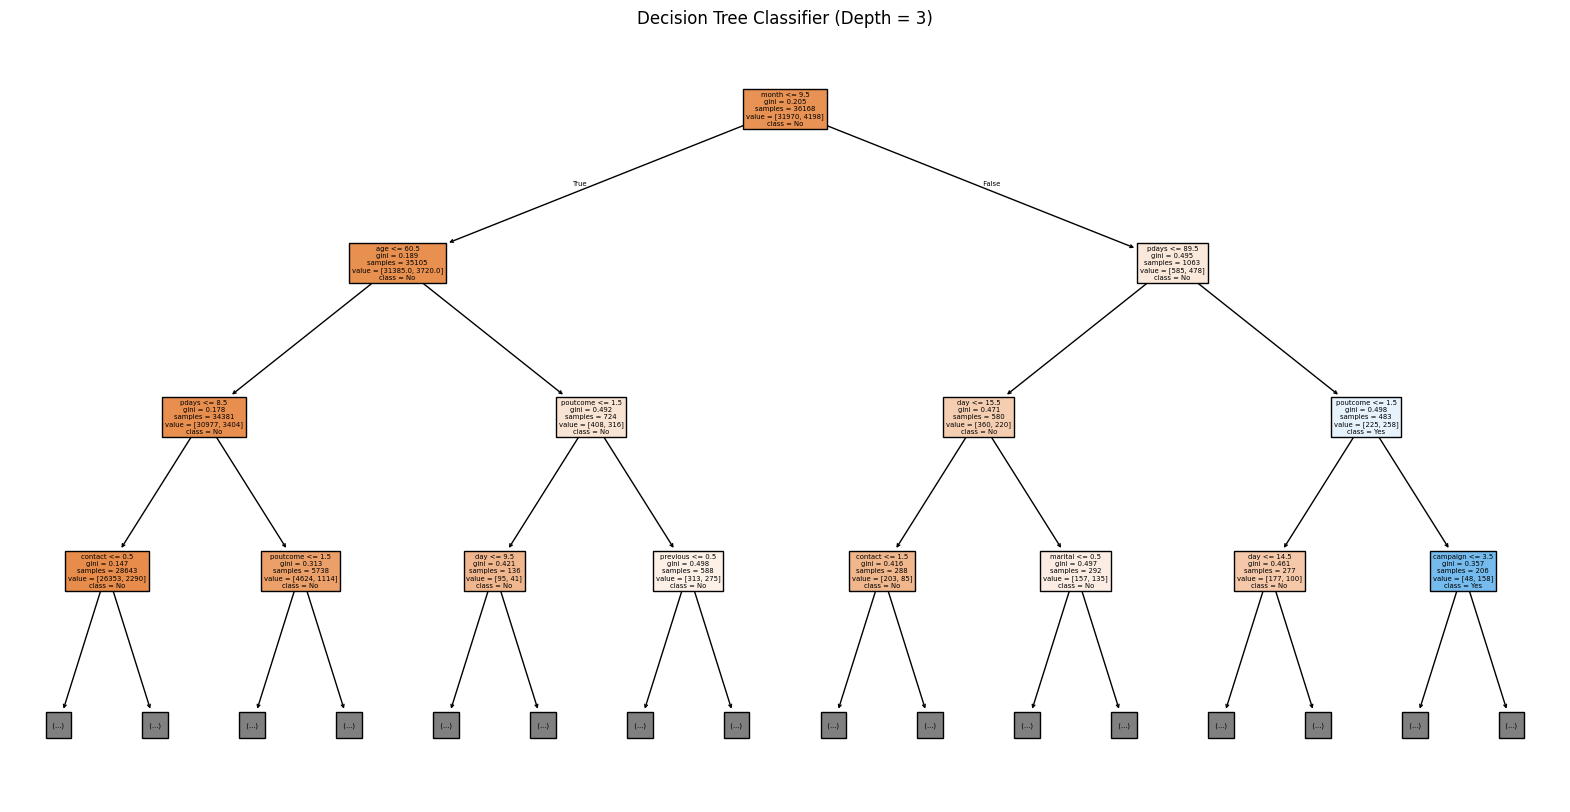

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/rd112/Downloads/bank+marketing/bank/bank-full.csv"
df = pd.read_csv(file_path, sep=';')

# Drop 'duration' to avoid data leakage
df.drop('duration', axis=1, inplace=True)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision tree (first 3 levels)
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title("Decision Tree Classifier (Depth = 3)")
plt.show()
